# 1. Collect/extract Data
Data on dependent and independent variables from kaggle dataset.

In [101]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #for data visualization
from sklearn.model_selection import train_test_split #for splitting the dataset

In [102]:
#creating a dataframe using pandas
heart= pd.read_csv('heart.csv')

In [103]:
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# 2. Pre-process the data
* Data imputation techniques maybe used to deal with missing values.
* Now variables such as ratio of variables or product of variables can be derived.
* Categorical data must first be pre-processed using dummy variables.

In [104]:
#check for null values in each column
heart.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [105]:
#get dummy variables for categorical values
#drop_first is used to drop first column
heart= pd.get_dummies(heart,drop_first= True)

# 3. Cleaning the data
* It will also help in check and removing outliers from data.
* We can also use describe to get outliers.

In [106]:
heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377,0.789760,0.188453,0.221133,0.050109,0.601307,0.193900,0.404139,0.501089,0.430283
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414,0.407701,0.391287,0.415236,0.218289,0.489896,0.395567,0.490992,0.500271,0.495386
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [107]:
'''
clearly there are outliers in data
RestingBP, Cholesterol can not be zero
'''
heart.drop(heart.index[heart['RestingBP'] == 0], inplace=True)
heart.drop(heart.index[heart['Cholesterol'] == 0], inplace=True)
#source- https://datascienceparichay.com/article/pandas-delete-rows-based-on-column-values/

In [108]:
#to avoid the additional index column
heart.to_csv('clean_heart.csv',index=False)

In [109]:
heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
count,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000
mean,52.882038,133.022788,244.635389,0.167560,140.226542,0.901609,0.477212,0.756032,0.222520,0.226542,0.054960,0.596515,0.167560,0.384718,0.474531,0.467828
std,9.505888,17.282750,59.153524,0.373726,24.524107,1.072861,0.499816,0.429762,0.416218,0.418874,0.228055,0.490926,0.373726,0.486855,0.499686,0.499299
min,28.000000,92.000000,85.000000,0.000000,69.000000,-0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,46.000000,120.000000,207.250000,0.000000,122.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,237.000000,0.000000,140.000000,0.500000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,59.000000,140.000000,275.000000,0.000000,160.000000,1.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 4. Dividing dataset into training and testing datasets

In [110]:
#clearly dependent variable(y) is HeartDisease and all other are independent variables(x)
y= ['HeartDisease']
x= list(heart.columns)
x.remove('HeartDisease')

In [111]:
#random state is used to keep train and test data exact same when we run same cell multiple times
train_x, test_x, train_y, test_y= train_test_split(heart[x], heart[y], train_size=0.8, random_state=5)

In [112]:
print(len(train_x),len(test_x))

596 150


In [113]:
test_x

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
774,66,178,228,1,165,1.0,0,0,0,0,1,0,1,1,0
875,58,120,340,0,172,0.0,0,0,1,0,1,0,0,0,1
12,39,120,204,0,145,0.0,1,1,0,0,1,0,0,0,1
713,64,140,313,0,133,0.2,0,0,1,0,1,0,0,0,1
163,42,120,196,0,150,0.0,1,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562,59,140,274,0,154,2.0,1,0,0,0,1,0,1,1,0
798,42,102,265,0,122,0.6,0,0,0,0,0,0,0,1,0
673,59,174,249,0,143,0.0,0,0,0,0,1,0,1,1,0
124,58,130,230,0,150,0.0,1,1,0,0,1,0,0,0,1


# 5. Perform Descriptive Analysis on Data
* It is a good practice to perform descriptive analysis before moving to building a predictive analytics model. Make scatter plot, box plot etc.

In [114]:
#getting summary 
train_x.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
count,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000
mean,52.548658,133.260067,245.038591,0.166107,140.884228,0.920638,0.771812,0.219799,0.226510,0.057047,0.597315,0.172819,0.384228,0.483221,0.463087
std,9.539796,17.237963,59.298109,0.372490,24.805496,1.084045,0.420017,0.414458,0.418924,0.232127,0.490850,0.378408,0.486821,0.500138,0.499054
min,29.000000,92.000000,85.000000,0.000000,69.000000,-0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,46.000000,120.000000,208.750000,0.000000,122.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,53.000000,130.000000,238.000000,0.000000,140.500000,0.550000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,59.000000,140.000000,275.000000,0.000000,160.000000,1.500000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [115]:
#getting summary 
test_x.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.00000,150.000000
mean,54.206667,132.080000,243.033333,0.173333,137.613333,0.826000,0.693333,0.233333,0.226667,0.046667,0.593333,0.146667,0.386667,0.44000,0.486667
std,9.283236,17.485764,58.745203,0.379803,23.268721,1.027242,0.462655,0.424370,0.420078,0.211631,0.492857,0.354958,0.488618,0.49805,0.501497
min,28.000000,100.000000,129.000000,0.000000,80.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,48.000000,120.000000,203.000000,0.000000,122.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,55.000000,130.000000,230.500000,0.000000,139.500000,0.350000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000
75%,59.750000,140.000000,275.000000,0.000000,155.000000,1.500000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000
max,77.000000,180.000000,491.000000,1.000000,194.000000,5.600000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


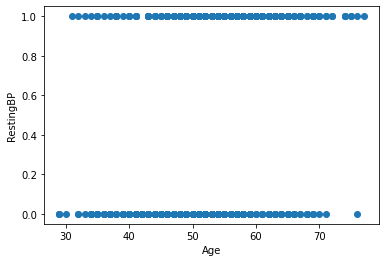

In [116]:
plt.scatter(train_x.Age,train_y.HeartDisease)
plt.xlabel('Age')
plt.ylabel('RestingBP')
plt.show()

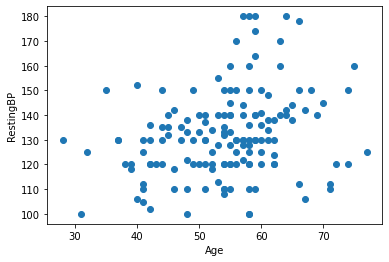

In [117]:
plt.scatter(test_x.Age,test_x.RestingBP)
plt.xlabel('Age')
plt.ylabel('RestingBP')
plt.show()

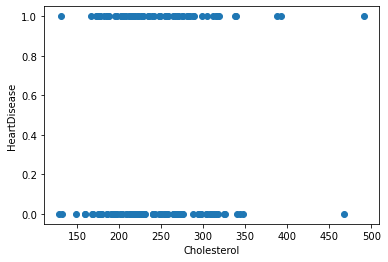

In [118]:
plt.scatter(test_x.Cholesterol,test_y.HeartDisease)
plt.xlabel('Cholesterol')
plt.ylabel('HeartDisease')
plt.show()

# 6. Build the Model
* In this case we will use Logistic Regression Model.
* It is because Predicting Heart Disease involve categorical value which comes under Classification Problem.
* More precisely Predicting Heart Disease uses Binary Logistic Regression Model. 

In [119]:
from sklearn.linear_model import LogisticRegression
#source- https://www.youtube.com/watch?v=zM4VZR0px8E&t=550s

In [120]:
#creating an object
#without solver='liblinear' not working properly
#source- https://stackoverflow.com/questions/65682019/attributeerror-str-object-has-no-attribute-decode-in-fitting-logistic-regre
model= LogisticRegression(solver='liblinear')

In [121]:
#training model
model.fit(train_x,train_y)

C:\Users\adarsh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(solver='liblinear')

In [122]:
predicted= model.predict(test_x)

# 7. Validate the model and measure model accuracy
A major concern in analytics is over-fitting(model performs well on the training dataset but may perform badly in validation or testing dataset.)

In [123]:
i=0
count=0
for val in test_y['HeartDisease']:
    #print(val)
    if val==predicted[i]:
        count+=1
    i+=1
    
print(round((count*100)/len(test_y),2))

86.67


In [124]:
round(model.score(test_x,test_y),3)

0.867